<h1 style="color: #4485b8;">Import</h1>

In [1]:
import MDAnalysis as mda
#import MDAnalysisData as data
from MDAnalysis.analysis.rms import RMSD

import nglview as nv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mda.warnings.showwarning
universo = mda.Universe("md_0_20_proteina_e_ligante.gro", "md_0_20_proteina_e_ligante.xtc")

<h1 style="color: #4485b8;">Info</h1>

In [3]:
# Nomes dos átomos
nomes_atomos = list(set(universo.atoms.names))
nomes_atomos.sort()

# Nome dos resíduos
nomes_residuos = list(set(universo.residues.resnames))
nomes_residuos.sort()

print("Número de átomos.................: {}".format(universo.atoms.n_atoms))
print("Nome dos átomos..................: {}".format(nomes_atomos))
print("Número de frames da trajetória...: {}".format(universo.trajectory.n_frames))
print("Número de resíduos...............: {}".format(universo.residues.n_residues))
print("Nomes dos resíduos...............: {}".format(nomes_residuos))


Número de átomos.................: 7239
Nome dos átomos..................: ['C', 'C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'CA', 'CB', 'CD', 'CD1', 'CD2', 'CE', 'CE1', 'CE2', 'CE3', 'CG', 'CG1', 'CG2', 'CH2', 'CZ', 'CZ2', 'CZ3', 'H1', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H2', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25', 'H26', 'H27', 'H28', 'H29', 'H3', 'H30', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'HA', 'HA1', 'HA2', 'HB', 'HB1', 'HB2', 'HB3', 'HD1', 'HD11', 'HD12', 'HD13', 'HD2', 'HD21', 'HD22', 'HD23', 'HD3', 'HE', 'HE1', 'HE2', 'HE21', 'HE22', 'HE3', 'HG', 'HG1', 'HG11', 'HG12', 'HG13', 'HG2', 'HG21', 'HG22', 'HG23', 'HH', 'HH11', 'HH12', 'HH2', 'HH21', 'HH22', 'HN', 'HZ', 'HZ1', 'HZ2', 'HZ3', 'N', 'ND1', 'ND2', 'NE', 'NE1', 'NE2', 'NH1', 'NH2', 'NZ', 'O', 'O1', 'O2', 'OD1', 'OD2', 'OE1', 'OE2', 'OG', 'OG1', 'OH', 'OT1', 'OT2', 'SD', 'SG']
Número de frames da 

<h1 style="color: #4485b8;">Visualize the universe</h1>

In [4]:
view_universe = nv.show_mdanalysis(universo)
view_universe

NGLWidget(max_frame=2000)

<h1 style="color: #4485b8;">Visualizando apenas a proteína</h1>

In [5]:
# seleciona apenas os átomos da proteína
ag = universo.select_atoms("protein")

In [6]:
view_ag = nv.show_mdanalysis(ag)
view_ag.parameters = dict(camera_type='orthographic', 
                       background_color='black',
                       clip_dist=0)
view_ag

NGLWidget(max_frame=2000)

In [7]:
#
# Exibibindo a visualização em formato 'licorice' (barras)
#
view_ag1 = nv.show_mdanalysis(ag)
view_ag1.parameters = dict(camera_type='orthographic', 
                       background_color='black',
                       clip_dist=0)
# Clear all representations to try new ones
view_ag1.clear_representations()
# Mostra estrutura 
view_ag1.add_licorice()
view_ag1

NGLWidget(max_frame=2000)

In [8]:
view_ag2 = nv.show_mdanalysis(ag)
view_ag2.parameters = dict(camera_type='orthographic', 
                       background_color='black',
                       clip_dist=0)
# Clear all representations to try new ones
view_ag2.clear_representations()
# Mostra estrutura 
view_ag2.add_ribbon()
view_ag2

NGLWidget(max_frame=2000)

In [9]:
#
# Apresenta uma superfície sobre a estrutura da proteína
#
view_ag3 = nv.show_mdanalysis(ag)
view_ag3.parameters = dict(camera_type='orthographic', 
                       background_color='black',
                       clip_dist=0)
view_ag3.clear_representations()
view_ag3.add_cartoon()
view_ag3.add_surface(opacity=0.3)
view_ag3

NGLWidget(max_frame=2000)

In [10]:
#
# Apresenta as estrutura que contenham anéis aromáticos
# 
view_ag4 = nv.show_mdanalysis(ag)
view_ag4.parameters = dict(camera_type='orthographic', 
                           background_color='black',
                           clip_dist=0)
view_ag4.clear()
view_ag4.add_cartoon("protein", color_scheme="residueindex")
# Exibe tudo que é aromático
view_ag4.add_licorice('aromatic', opacity=0.5)
view_ag4

NGLWidget(max_frame=2000)

In [11]:
#
# Destacando as alaninas
#
view_ag5 = nv.show_mdanalysis(ag)
view_ag5.parameters = dict(camera_type='orthographic', 
                       background_color='black',
                       clip_dist=0)
view_ag5.clear()
view_ag5.add_cartoon("protein", color_scheme="residueindex")
# A representação 'licorice' apenas para as alaninas
view_ag5.add_licorice('ALA')
view_ag5

NGLWidget(max_frame=2000)

<h1 style="color: #4485b8;">Visualizando apenas o ligante</h1>

In [22]:
#
# Seleciona apenas os átomos do ligante (mais especificamente, mostraria tudo que não é proteína)
#
ligante = universo.select_atoms("not protein")
view_ligante = nv.show_mdanalysis(ligante)
view_ligante.parameters = dict(camera_type='orthographic', 
                               background_color='black',
                               clip_dist=0)
view_ligante

NGLWidget(max_frame=2000)

<h1 style="color: #4485b8;">RMSD proteina</h1>

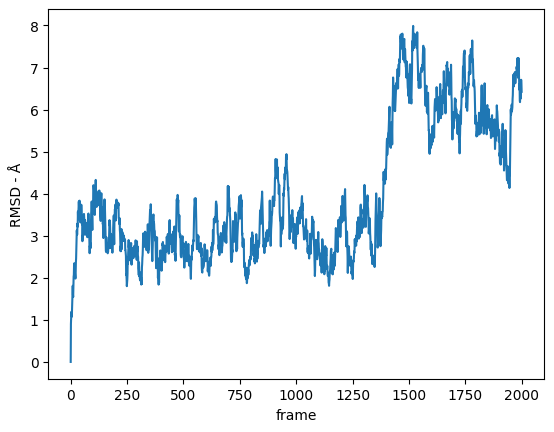

In [13]:
# Em vez de usar 'name CA' para selecionar os átomos, poderia ter utilizado 'backbone'
c_alphas = universo.select_atoms('name CA')

R = RMSD(c_alphas, c_alphas)
R.run()
plt.plot(R.results.rmsd.T[0], R.results.rmsd.T[2])
plt.xlabel('frame')
plt.ylabel('RMSD - Å')
plt.show()

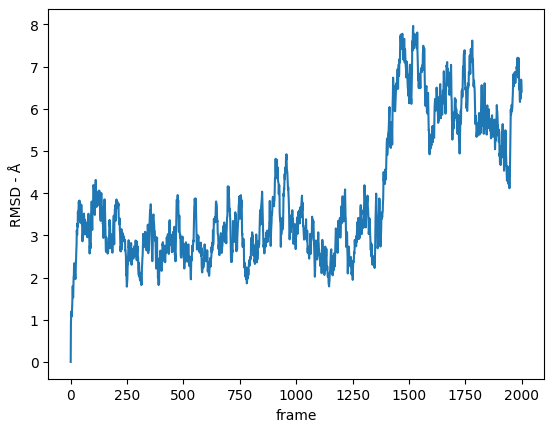

In [14]:
c_alphas = universo.select_atoms('backbone')

R = RMSD(c_alphas, c_alphas)
R.run()
plt.plot(R.results.rmsd.T[0], R.results.rmsd.T[2])
plt.xlabel('frame')
plt.ylabel('RMSD - Å')
plt.show()

<h1 style="color: #4485b8;">RMSD ligante</h1>

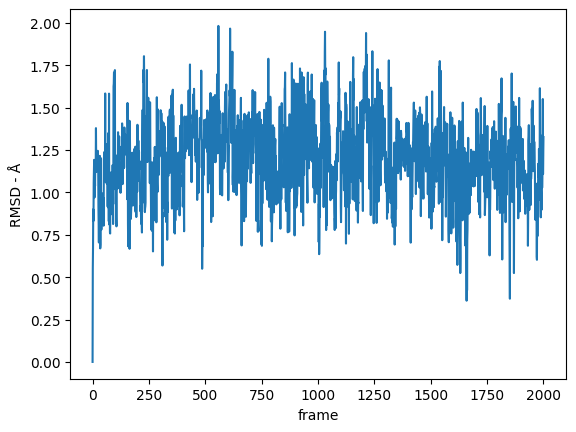

In [18]:
# Em vez de usar 'name CA' para selecionar os átomos, poderia ter utilizado 'backbone'
c_alphas = universo.select_atoms('not protein')

R = RMSD(c_alphas, c_alphas)
R.run()
plt.plot(R.results.rmsd.T[0], R.results.rmsd.T[2])
plt.xlabel('frame')
plt.ylabel('RMSD - Å')
plt.show()

<h1 style="color: #4485b8;">Distâncias</h1>

In [15]:
# Selecionando átomos da proteína (AtomGroup)
proteina = universo.select_atoms("protein")
posicoes = proteina.positions
print(f'AtomGroup has length {len(proteina)} and positions is shape {posicoes.shape}')


AtomGroup has length 7186 and positions is shape (7186, 3)


In [16]:
proteina.center_of_mass()

array([62.77252423, 59.11405925, 60.59947618])

In [17]:
print("Centro de massa....: {}".format(proteina.center_of_mass()))
print("Centro da geometria: {}".format(proteina.center_of_geometry()))

Centro de massa....: [62.77252423 59.11405925 60.59947618]
Centro da geometria: [62.82555823 59.10549544 60.53485258]
